<a href="https://colab.research.google.com/github/ECastro08/Alura-Store-Challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [59]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.sample()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
96,Olla de presión,Artículos para el hogar,78300.0,4600.0,27/09/2022,Mariana Herrera,Cali,5,Tarjeta de crédito,10,3.43722,-76.5225


#1. Análisis de facturación



In [25]:
from numpy._core.fromnumeric import mean
ingreso_tienda1 = sum(tienda['Precio'])
ingreso_tienda2 = sum(tienda2['Precio'])
ingreso_tienda3 = sum(tienda3['Precio'])
ingreso_tienda4 = sum(tienda4['Precio'])

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]


## Grafico de los ingresos totales por cada tienda

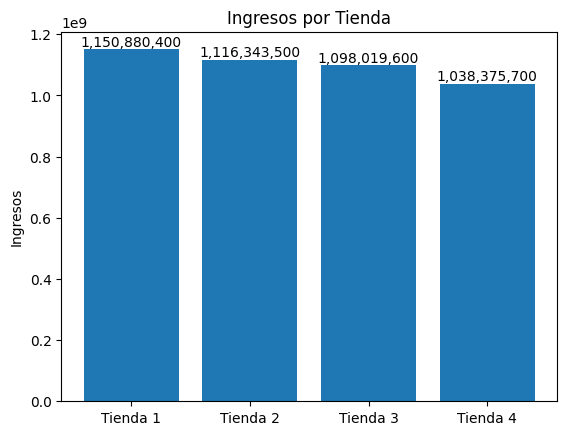

In [26]:
fig, ax = plt.subplots()
bar_container = ax.bar(tiendas, ingresos)
ax.set(ylabel='Ingresos', title='Ingresos por Tienda')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

# 2. Ventas por categoría

## Agrupando las columnas de cada uno de los datasets de las tiendas para ver la cantidad de productos vendidos

In [27]:
df1_ventas = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df2_ventas = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df3_ventas = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df4_ventas = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


## Graficos cantidad de Productos vendidos

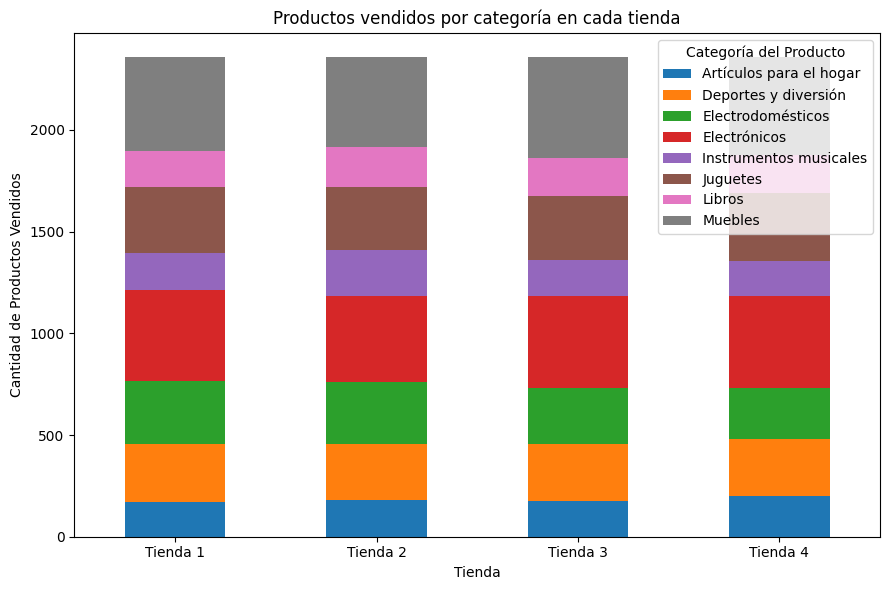

In [35]:
df_ventas_combinado = pd.DataFrame({
    'Tienda 1': df1_ventas,
    'Tienda 2': df2_ventas,
    'Tienda 3': df3_ventas,
    'Tienda 4': df4_ventas
})

df_ventas_combinado.T.plot(kind='bar', stacked=True, figsize=(9, 6))
plt.title('Productos vendidos por categoría en cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

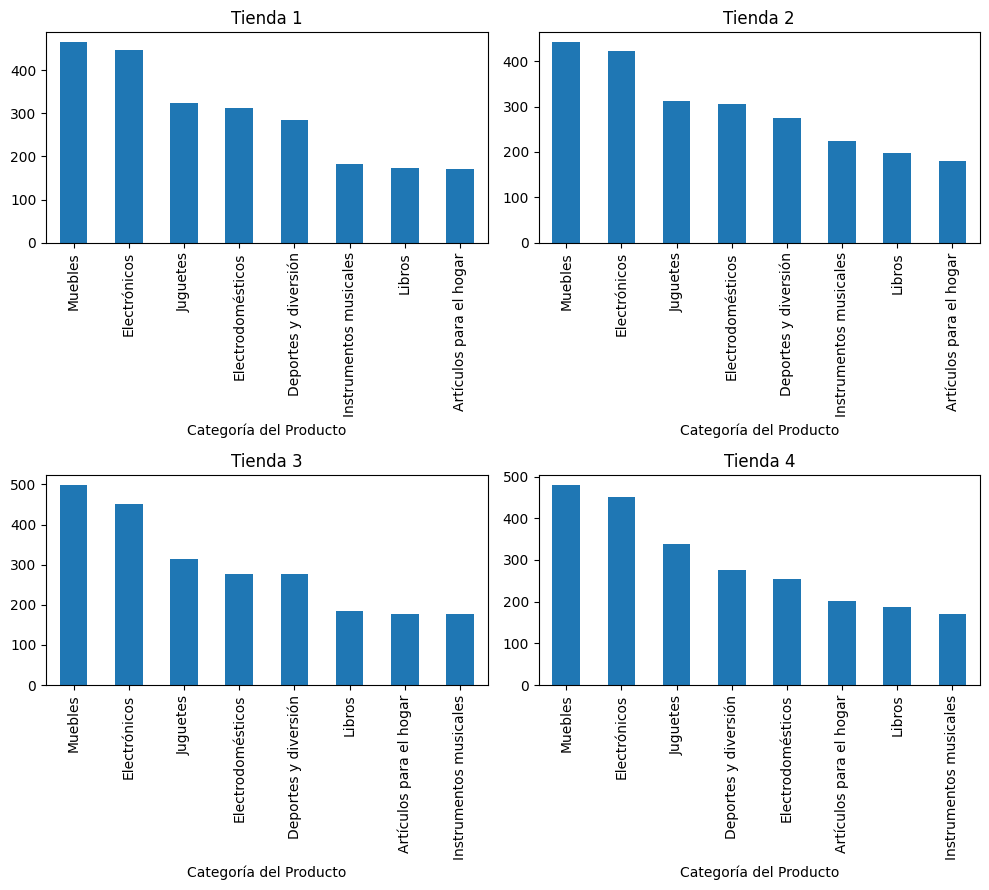

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))

df1_ventas.plot(kind='bar', ax=axes[0, 0], title='Tienda 1')
df2_ventas.plot(kind='bar', ax=axes[0, 1], title='Tienda 2')
df3_ventas.plot(kind='bar', ax=axes[1, 0], title='Tienda 3')
df4_ventas.plot(kind='bar', ax=axes[1, 1], title='Tienda 4')

plt.tight_layout()
plt.show()

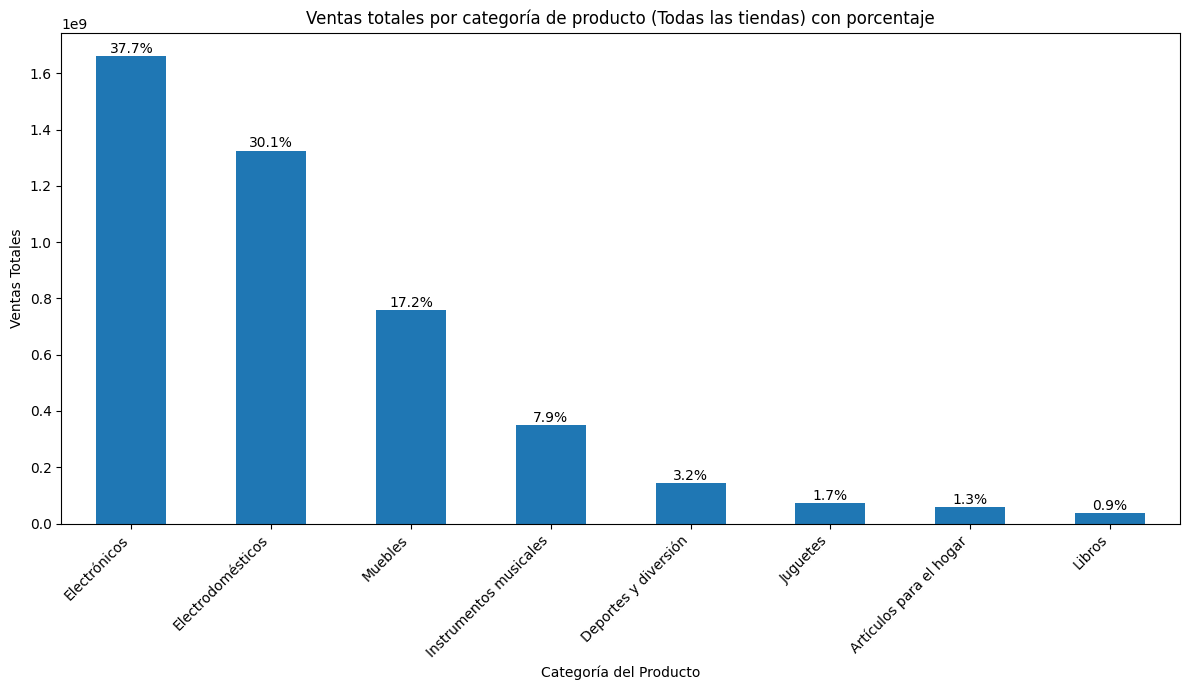

In [43]:

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_categoria = df_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

ventas_totales_tiendas = ventas_categoria.sum()
porcentaje_categoria = (ventas_categoria / ventas_totales_tiendas) * 100

plt.figure(figsize=(12, 7))
ax = ventas_categoria.plot(kind='bar')
plt.title('Ventas totales por categoría de producto (Todas las tiendas) con porcentaje')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(ventas_categoria):
    ax.text(i, v + 1000000, f'{porcentaje_categoria.iloc[i]:.1f}%', ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


## obteniendo el promedio de las calificaciones de cada tienda

In [6]:
calificacion_tienda1 = round(tienda.Calificación.mean(),3)
calificacion_tienda2 = round(tienda2.Calificación.mean(),3)
calificacion_tienda3 = round(tienda3.Calificación.mean(),3)
calificacion_tienda4 = round(tienda4.Calificación.mean(),3)

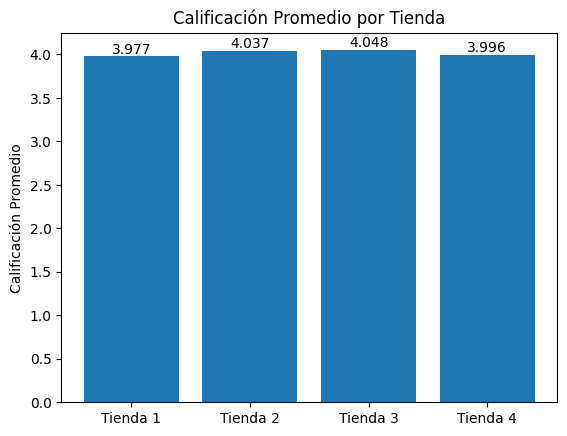

In [37]:
calificaciones = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

fig, ax = plt.subplots()
bar_container = ax.bar(tiendas, calificaciones)
ax.set(ylabel='Calificación Promedio', title='Calificación Promedio por Tienda')
ax.bar_label(bar_container, fmt='{:,.3f}')
plt.show()

# 4. Productos más y menos vendidos

In [63]:
tienda1_product_counts = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)
tienda2_product_counts = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False)
tienda3_product_counts = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False)
tienda4_product_counts = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False)

tienda1_products_tv = tienda.groupby('Producto')["Precio"].sum().sort_values(ascending=False)
tienda1_products_tv

,Precio
Producto,
TV LED UHD 4K,142150200.0
Refrigerador,112143300.0
Iphone 15,97902200.0
Smart TV,67452100.0
Lavadora de ropa,65783600.0
Lavavajillas,62054900.0
Secadora de ropa,59062400.0
Tablet ABXY,47639800.0
Batería,37693900.0


## Graficos (top de productos mas y menos vendidos por tienda)

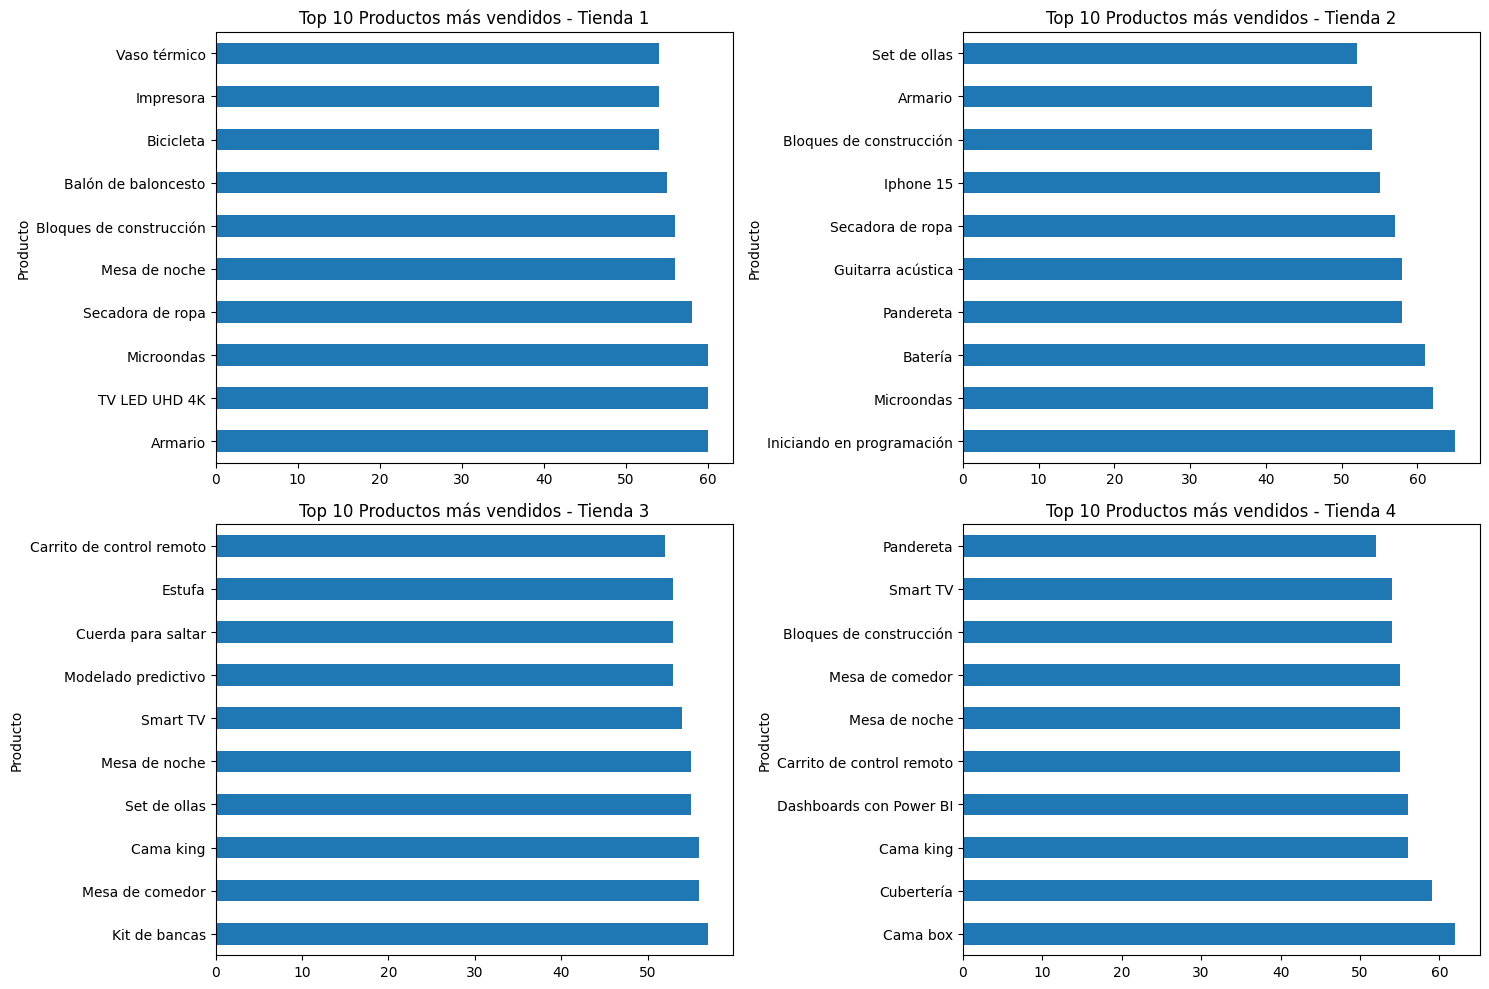

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

tienda1_product_counts.head(10).plot(kind='barh', ax=axes[0, 0], title='Top 10 Productos más vendidos - Tienda 1')
tienda2_product_counts.head(10).plot(kind='barh', ax=axes[0, 1], title='Top 10 Productos más vendidos - Tienda 2')
tienda3_product_counts.head(10).plot(kind='barh', ax=axes[1, 0], title='Top 10 Productos más vendidos - Tienda 3')
tienda4_product_counts.head(10).plot(kind='barh', ax=axes[1, 1], title='Top 10 Productos más vendidos - Tienda 4')

plt.tight_layout()
plt.show()

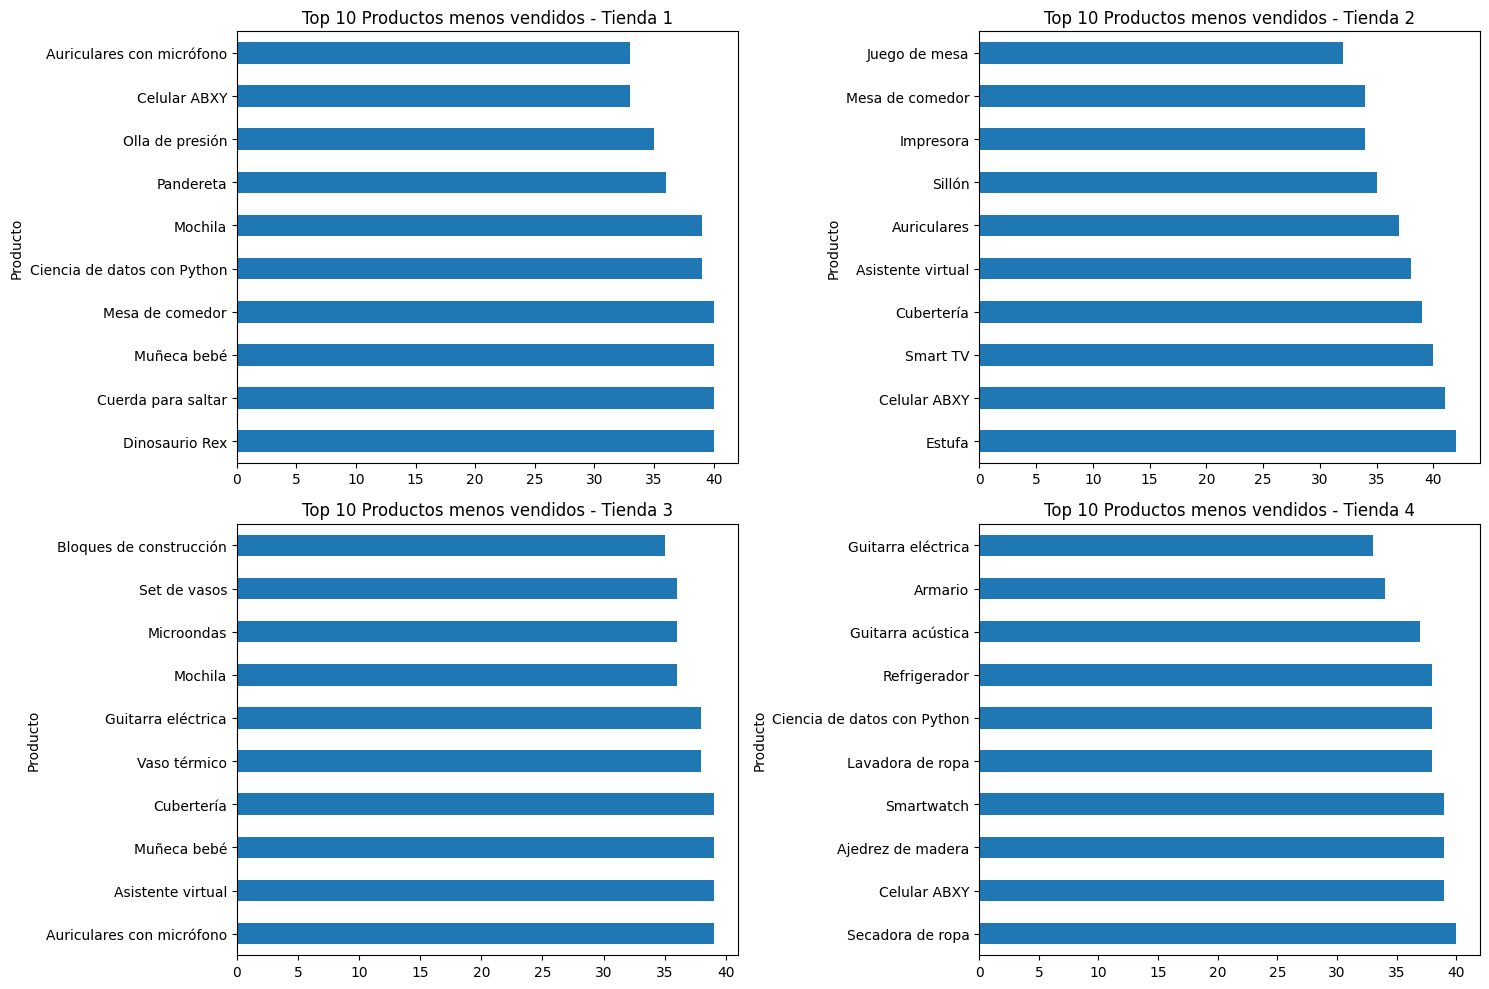

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

tienda1_product_counts.tail(10).plot(kind='barh', ax=axes[0, 0], title='Top 10 Productos menos vendidos - Tienda 1')
tienda2_product_counts.tail(10).plot(kind='barh', ax=axes[0, 1], title='Top 10 Productos menos vendidos - Tienda 2')
tienda3_product_counts.tail(10).plot(kind='barh', ax=axes[1, 0], title='Top 10 Productos menos vendidos - Tienda 3')
tienda4_product_counts.tail(10).plot(kind='barh', ax=axes[1, 1], title='Top 10 Productos menos vendidos - Tienda 4')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [65]:
tienda['costo_total_con_envio'] = tienda['Precio'] + tienda['Costo de envío']
tienda2['costo_total_con_envio'] = tienda2['Precio'] + tienda2['Costo de envío']
tienda3['costo_total_con_envio'] = tienda3['Precio'] + tienda3['Costo de envío']
tienda4['costo_total_con_envio'] = tienda4['Precio'] + tienda4['Costo de envío']

In [75]:
promedio_costo_tienda1 = round(tienda.costo_total_con_envio.mean(),3)
promedio_costo_tienda2 = round(tienda2.costo_total_con_envio.mean(),3)
promedio_costo_tienda3 = round(tienda3.costo_total_con_envio.mean(),3)
promedio_costo_tienda4 = round(tienda4.costo_total_con_envio.mean(),3)


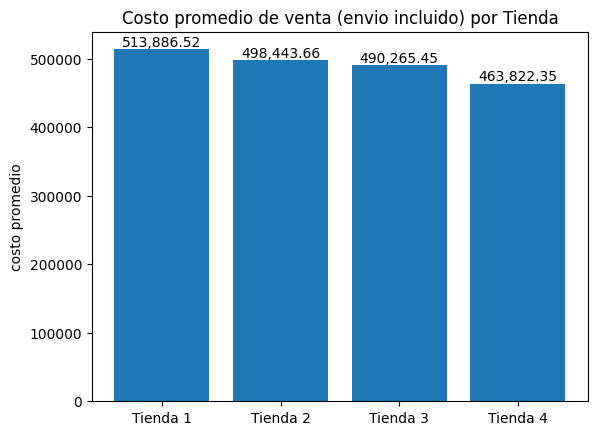

In [77]:
promedio_envios = [promedio_costo_tienda1, promedio_costo_tienda2, promedio_costo_tienda3, promedio_costo_tienda4]

fig, ax = plt.subplots()
bar_container = ax.bar(tiendas, promedio_envios)
ax.set(ylabel='costo promedio', title='Costo promedio de venta (envio incluido) por Tienda')
ax.bar_label(bar_container, fmt='{:,.2f}')
plt.show()